In [5]:
import pandas as pd
import numpy as np

data = pd.read_csv('output/feature_df.csv', sep=';', low_memory=False)

In [6]:
dataset = data.copy(deep=True)
dataset.head()

,dos_id,age,sexe,residence,mode_entree,etat_patient_entree,motif_code,motif_admission,score_tri,occupation_lits,...,week,month,quarter,est_venu_3_derniers_mois,est_venu_derniers_48h,moyenne_dynamique_temps_attente,date_arrivee_patient,wait_time_ext,wait_time_interne,wait_time
0,2226,46,2,81290.0,11.0,2,R52.9,Non precise,4,0.890957,...,4,1,1,NaN,NaN,27.000000,2019-01-22 08:46:00,27.0,0.0,27.0
1,2228,16,1,81100.0,11.0,2,M79.61,Non precise,5,0.904255,...,4,1,1,NaN,NaN,28.000000,2019-01-22 09:00:00,29.0,0.0,29.0
2,2229,63,2,81700.0,11.0,2,J02.9,Non precise,5,0.906915,...,4,1,1,NaN,NaN,39.333333,2019-01-22 09:06:00,25.0,37.0,62.0
3,2230,38,1,81100.0,11.0,2,R22.1,Non precise,5,0.906915,...,4,1,1,NaN,NaN,43.000000,2019-01-22 09:15:00,25.0,29.0,54.0
4,2231,55,2,81290.0,11.0,2,T13.9,Non precise,5,0.909574,...,4,1,1,NaN,NaN,44.400000,2019-01-22 09:20:00,23.0,27.0,50.0


In [7]:
dataset['hour_of_day'].value_counts()

10    6616
9     6089
11    5973
14    5642
13    5604
15    5368
16    5030
12    5019
17    4994
18    4909
8     4493
19    4352
20    3844
21    3495
22    2777
23    2416
7     2044
0     1912
1     1568
6     1333
2     1298
3     1151
4     1121
5     1118
Name: hour_of_day, dtype: int64

In [760]:
dataset.columns

Index(['dos_id', 'age', 'sexe', 'residence', 'mode_entree',
       'etat_patient_entree', 'motif_code', 'motif_admission', 'score_tri',
       'occupation_lits', 'nbre_patient_urgence', 'occupation_salles_att',
       'ratio_medecin_patient', 'ratio_interne_patient',
       'ratio_infirmiere_patient', 'nbre_patient_score_0',
       'nbre_patient_score_1', 'nbre_patient_score_2', 'nbre_patient_score_3',
       'nbre_patient_score_4', 'nbre_patient_score_5',
       'nbre_patient_salle_att_ext', 'nbre_patient_salle_att_interne',
       'nbre_patient_traite_sans_fin_PEC', 'nbre_patient_entre_finPEC_sortie',
       'nbre_patient_UHCD', 'hour_of_day', 'UHCD_saturee', 'day_of_week',
       'is_weekend', 'week', 'month', 'quarter', 'est_venu_3_derniers_mois',
       'est_venu_derniers_48h', 'moyenne_dynamique_temps_attente',
       'date_arrivee_patient', 'wait_time_ext', 'wait_time_interne',
       'wait_time'],
      dtype='object')

In [761]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88166 entries, 0 to 88165
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   dos_id                            88166 non-null  int64         
 1   age                               88166 non-null  int64         
 2   sexe                              88166 non-null  int64         
 3   residence                         87419 non-null  object        
 4   mode_entree                       88090 non-null  float64       
 5   etat_patient_entree               88166 non-null  int64         
 6   motif_code                        87941 non-null  object        
 7   motif_admission                   88078 non-null  object        
 8   score_tri                         88166 non-null  int64         
 9   occupation_lits                   88166 non-null  float64       
 10  nbre_patient_urgence              88166 non-nu

In [762]:
dataset.drop(columns=['dos_id', 'motif_admission', 'ratio_medecin_patient', 'ratio_interne_patient',
                      'ratio_infirmiere_patient', 'nbre_patient_salle_att_ext', 'nbre_patient_salle_att_interne',
                      'nbre_patient_traite_sans_fin_PEC', 'nbre_patient_entre_finPEC_sortie',
                      'nbre_patient_UHCD', 'UHCD_saturee', 'est_venu_3_derniers_mois',
                      'est_venu_derniers_48h', 'date_arrivee_patient'], inplace=True)

In [763]:
dataset.shape

(88166, 26)

In [764]:
dataset.head()

,age,sexe,residence,mode_entree,etat_patient_entree,motif_code,score_tri,occupation_lits,nbre_patient_urgence,occupation_salles_att,...,hour_of_day,day_of_week,is_weekend,week,month,quarter,moyenne_dynamique_temps_attente,wait_time_ext,wait_time_interne,wait_time
0,46,2,81290.0,11.0,2,R52.9,4,0.890957,0.0,0.000000,...,8,1,False,4,1,1,27.000000,27.0,0.0,27.0
1,16,1,81100.0,11.0,2,M79.61,5,0.904255,1.0,1.000000,...,9,1,False,4,1,1,28.000000,29.0,0.0,29.0
2,63,2,81700.0,11.0,2,J02.9,5,0.906915,2.0,1.000000,...,9,1,False,4,1,1,39.333333,25.0,37.0,62.0
3,38,1,81100.0,11.0,2,R22.1,5,0.906915,3.0,0.666667,...,9,1,False,4,1,1,43.000000,25.0,29.0,54.0
4,55,2,81290.0,11.0,2,T13.9,5,0.909574,4.0,0.750000,...,9,1,False,4,1,1,44.400000,23.0,27.0,50.0


In [765]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [766]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88166 entries, 0 to 88165
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              88166 non-null  int64  
 1   sexe                             88166 non-null  int64  
 2   residence                        87419 non-null  object 
 3   mode_entree                      88090 non-null  float64
 4   etat_patient_entree              88166 non-null  int64  
 5   motif_code                       87941 non-null  object 
 6   score_tri                        88166 non-null  int64  
 7   occupation_lits                  88166 non-null  float64
 8   nbre_patient_urgence             88166 non-null  float64
 9   occupation_salles_att            88166 non-null  float64
 10  nbre_patient_score_0             88166 non-null  float64
 11  nbre_patient_score_1             88166 non-null  float64
 12  nbre_patient_score

In [767]:
data['wait_time'].describe()

count    88166.000000
mean        85.084420
std        285.361208
min          0.000000
25%         14.000000
50%         42.000000
75%        121.000000
max      75534.000000
Name: wait_time, dtype: float64

In [768]:
data[data['wait_time'] < 0]

,dos_id,age,sexe,residence,mode_entree,etat_patient_entree,motif_code,motif_admission,score_tri,occupation_lits,...,week,month,quarter,est_venu_3_derniers_mois,est_venu_derniers_48h,moyenne_dynamique_temps_attente,date_arrivee_patient,wait_time_ext,wait_time_interne,wait_time


## Outlier removal with sliding window

In [769]:
import seaborn as sns

len(dataset.wait_time)

88166

<AxesSubplot:>

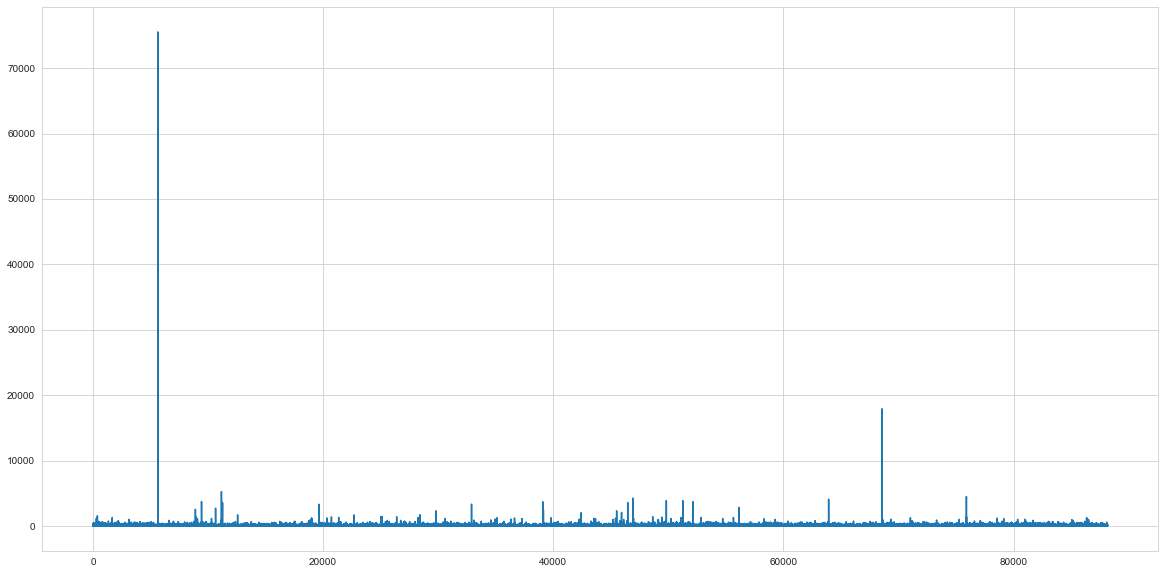

In [770]:
dataset.wait_time.plot(figsize=(20,10))

C:\Users\NBA\anaconda3\envs\Data_Science\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wait_time'>

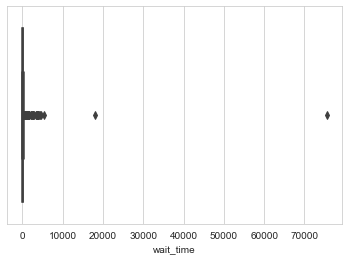

In [771]:
sns.boxplot(dataset.wait_time)

In [772]:
#Based on IQR
max = np.mean(dataset['wait_time']) + np.nanquantile(dataset['wait_time'],0.99)
min = np.mean(dataset['wait_time']) - np.nanquantile(dataset['wait_time'],0.99)

df = dataset[(dataset['wait_time'] > max)]
print("min: ", min)
print("max: ", max)
print("IQR Outlier percentage in wait time: {:.3f}".format(len(df)/len(dataset)))

min:  -340.91557970192594
max:  511.08442029807406
IQR Outlier percentage in wait time: 0.005


In [773]:
dataset = dataset[(dataset['wait_time'] <= max)]
dataset.shape

(87719, 26)

<AxesSubplot:>

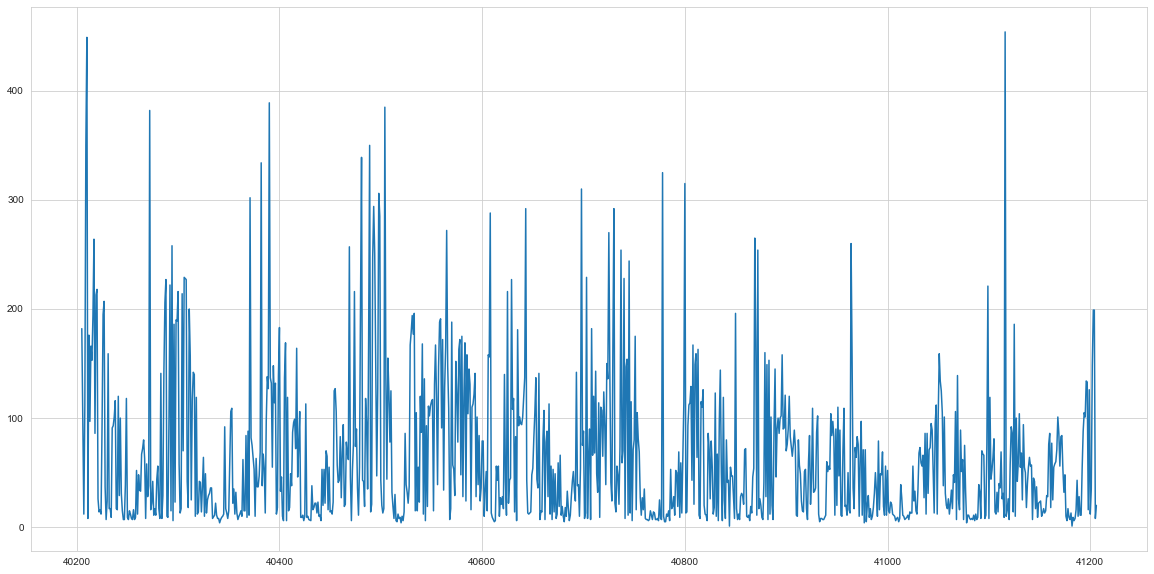

In [774]:
column = dataset['wait_time']
column[40000:41000].plot(figsize=(20,10))

C:\Users\NBA\anaconda3\envs\Data_Science\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wait_time'>

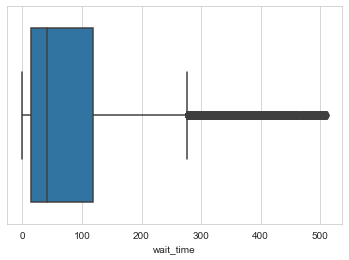

In [775]:
sns.boxplot(dataset.wait_time)

In [776]:
#parameters
window_percentage = 0.1
k = int(len(column) * (window_percentage/100))
N = len(column)
(k,N)

(87, 87719)

In [777]:
patients = np.arange(0,N)
(len(dataset),len(patients))

(87719, 87719)

In [778]:
column = column.to_numpy()

#Bands with std
get_bands = lambda col : (np.mean(col) + 2*np.std(col),np.mean(col) - 2*np.std(col))

#Bands with 99% percentile
#get_bands = lambda col : (np.mean(col) + np.nanquantile(col,0.99),np.mean(col) - np.nanquantile(col,0.99))

In [779]:
import time

start = time.time()
bands = [get_bands(column[range(0 if i-k<0 else i-k, i+k if i+k<N else N)]) for i in range(0,N)]

print("Elapsed time: ", time.time() - start,"s")
upper, lower = zip(*bands)

Elapsed time:  27.086540699005127 s


In [780]:
# compute local outliers
anomalies = (column > upper) | (column < lower)
#len(anomalies[anomalies[0] == True])
pd.DataFrame(anomalies).value_counts()

False    87486
True       233
dtype: int64

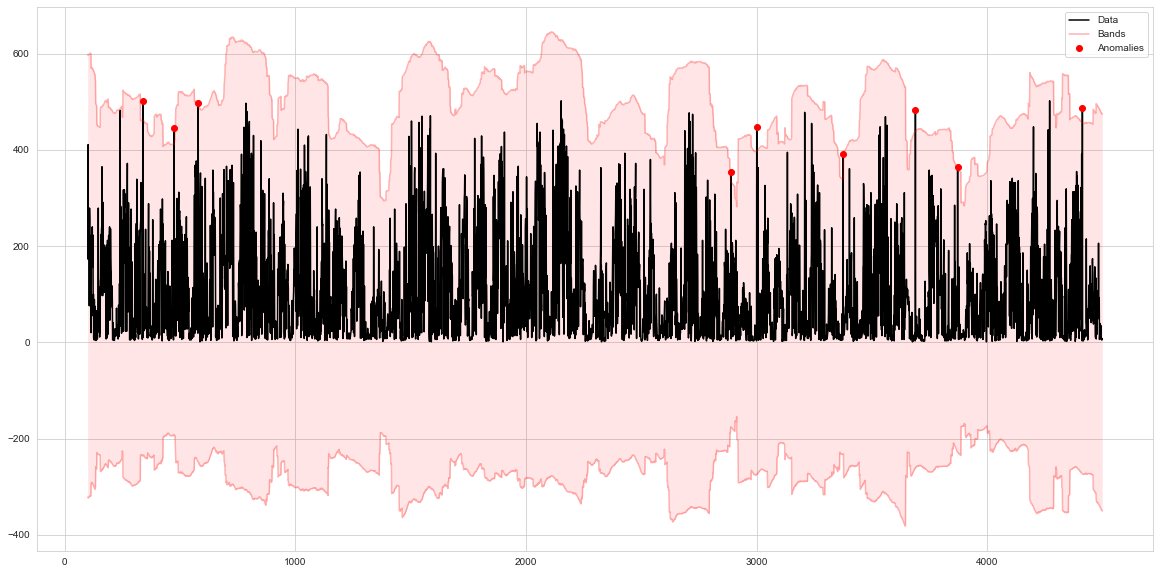

In [781]:
import matplotlib.pyplot as plt

# plotting...
# default
#range_min = 0
#range_max = len(column)
range_min = 100
range_max = 4500
anomalies_slice = anomalies[range_min:range_max]

plt.figure(figsize=(20,10))
plt.plot(patients[range_min:range_max],column[range_min:range_max],'k',label='Data')
plt.plot(patients[range_min:range_max],upper[range_min:range_max],'r-',label='Bands',alpha=0.3)
plt.plot(patients[range_min:range_max],lower[range_min:range_max],'r-',alpha=0.3)

plt.plot(patients[range_min:range_max][anomalies_slice],column[range_min:range_max][anomalies_slice],'ro',label='Anomalies')
plt.fill_between(patients[range_min:range_max], upper[range_min:range_max], lower[range_min:range_max],facecolor='red',alpha=0.1)
plt.legend()

plt.show()

In [782]:
#dataset.reset_index(drop=True, inplace=True)

dataset["outlier"] = pd.DataFrame(anomalies)[0]

In [783]:
dataset["outlier"].value_counts()

False    87042
True       232
Name: outlier, dtype: int64

In [784]:
dataset = dataset[dataset["outlier"] == False]
dataset.shape

(87042, 27)

In [785]:
dataset.outlier.value_counts()

False    87042
Name: outlier, dtype: int64

In [786]:
dataset.tail()

,age,sexe,residence,mode_entree,etat_patient_entree,motif_code,score_tri,occupation_lits,nbre_patient_urgence,occupation_salles_att,...,day_of_week,is_weekend,week,month,quarter,moyenne_dynamique_temps_attente,wait_time_ext,wait_time_interne,wait_time,outlier
87714,65,1,81100.0,11.0,2,R06.0,3,0.484043,19.0,0.315789,...,1,False,16,4,2,69.466667,5.0,270.0,275.0,False
87715,13,2,81290.0,11.0,2,T11.9,4,0.484043,20.0,0.250000,...,1,False,16,4,2,65.200000,3.0,17.0,20.0,False
87716,57,2,34330.0,16.0,2,T50.9,3,0.486702,21.0,0.285714,...,1,False,16,4,2,61.466667,11.0,46.0,57.0,False
87717,23,1,81210.0,11.0,2,R10.4,4,0.486702,18.0,0.055556,...,1,False,16,4,2,63.600000,3.0,80.0,83.0,False
87718,97,2,81230.0,16.0,1,T13.9,4,0.486702,16.0,0.125000,...,1,False,16,4,2,64.133333,15.0,2.0,17.0,False


In [787]:
dataset.drop(columns=['outlier'], inplace=True)
dataset.reset_index(drop=True, inplace=True)
dataset.tail()

,age,sexe,residence,mode_entree,etat_patient_entree,motif_code,score_tri,occupation_lits,nbre_patient_urgence,occupation_salles_att,...,hour_of_day,day_of_week,is_weekend,week,month,quarter,moyenne_dynamique_temps_attente,wait_time_ext,wait_time_interne,wait_time
87037,65,1,81100.0,11.0,2,R06.0,3,0.484043,19.0,0.315789,...,21,1,False,16,4,2,69.466667,5.0,270.0,275.0
87038,13,2,81290.0,11.0,2,T11.9,4,0.484043,20.0,0.250000,...,21,1,False,16,4,2,65.200000,3.0,17.0,20.0
87039,57,2,34330.0,16.0,2,T50.9,3,0.486702,21.0,0.285714,...,21,1,False,16,4,2,61.466667,11.0,46.0,57.0
87040,23,1,81210.0,11.0,2,R10.4,4,0.486702,18.0,0.055556,...,22,1,False,16,4,2,63.600000,3.0,80.0,83.0
87041,97,2,81230.0,16.0,1,T13.9,4,0.486702,16.0,0.125000,...,23,1,False,16,4,2,64.133333,15.0,2.0,17.0


C:\Users\NBA\anaconda3\envs\Data_Science\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wait_time'>

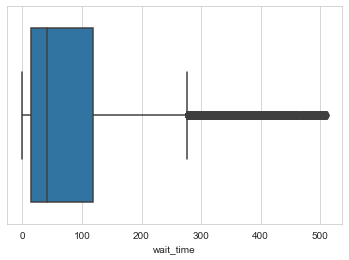

In [788]:
sns.boxplot(dataset.wait_time)

## Features encoding

In [789]:
# Separate into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop(['wait_time_ext', 'wait_time_interne', 'wait_time'], axis=1),
    dataset['wait_time'],
    test_size=0.3,
    random_state=0
)

In [790]:
# set up the imputer
# Use most frequent values to impute categorical data
mode_imputer = SimpleImputer(strategy='most_frequent')

In [791]:
# fit the imputer
mode_imputer.fit(X_train)

SimpleImputer(strategy='most_frequent')

In [792]:
# transform the data
X_train = mode_imputer.transform(X_train)

In [793]:
X_train.shape

(60929, 23)

In [794]:
X_train = pd.DataFrame(X_train)
X_train.columns = dataset.columns[:-3]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60929 entries, 0 to 60928
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   age                              60929 non-null  object
 1   sexe                             60929 non-null  object
 2   residence                        60929 non-null  object
 3   mode_entree                      60929 non-null  object
 4   etat_patient_entree              60929 non-null  object
 5   motif_code                       60929 non-null  object
 6   score_tri                        60929 non-null  object
 7   occupation_lits                  60929 non-null  object
 8   nbre_patient_urgence             60929 non-null  object
 9   occupation_salles_att            60929 non-null  object
 10  nbre_patient_score_0             60929 non-null  object
 11  nbre_patient_score_1             60929 non-null  object
 12  nbre_patient_score_2            

In [795]:
y_train = y_train.reset_index(drop=True)
y_train.head()

0      7.0
1     27.0
2    156.0
3      6.0
4     14.0
Name: wait_time, dtype: float64

In [796]:
X_test = mode_imputer.transform(X_test)

In [797]:
X_test = pd.DataFrame(X_test)
X_test.columns = dataset.columns[:-3]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26113 entries, 0 to 26112
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   age                              26113 non-null  object
 1   sexe                             26113 non-null  object
 2   residence                        26113 non-null  object
 3   mode_entree                      26113 non-null  object
 4   etat_patient_entree              26113 non-null  object
 5   motif_code                       26113 non-null  object
 6   score_tri                        26113 non-null  object
 7   occupation_lits                  26113 non-null  object
 8   nbre_patient_urgence             26113 non-null  object
 9   occupation_salles_att            26113 non-null  object
 10  nbre_patient_score_0             26113 non-null  object
 11  nbre_patient_score_1             26113 non-null  object
 12  nbre_patient_score_2            

In [798]:
X_test.head()

,age,sexe,residence,mode_entree,etat_patient_entree,motif_code,score_tri,occupation_lits,nbre_patient_urgence,occupation_salles_att,...,nbre_patient_score_3,nbre_patient_score_4,nbre_patient_score_5,hour_of_day,day_of_week,is_weekend,week,month,quarter,moyenne_dynamique_temps_attente
0,63,2,81100.0,11.0,2,M79.61,5,0.784574,15.0,0.266667,...,4.0,10.0,1.0,14,2,False,1,1,1,66.2
1,51,1,81100.0,11.0,2,T13.9,4,0.704787,31.0,0.548387,...,6.0,12.0,10.0,14,0,False,29,7,3,128.2
2,68,1,81100.0,11.0,2,S00.8,4,0.805851,19.0,0.315789,...,7.0,7.0,5.0,16,1,False,5,2,1,75.4
3,89,2,81210.0,11.0,2,R39.8,4,0.664894,2.0,0.0,...,0.0,1.0,0.0,8,6,True,17,5,2,9.466667
4,12,1,81200,11.0,2,R51,5,0.744681,27.0,0.481481,...,3.0,8.0,14.0,11,2,False,40,10,4,164.0


In [799]:
#Features encoding
from feature_engine.encoding import CountFrequencyEncoder

# set up the encoder
encoder = CountFrequencyEncoder(encoding_method='frequency',
                                variables=['residence', 'motif_code'])

# fit the encoder
encoder.fit(X_train)

CountFrequencyEncoder(encoding_method='frequency',
                      variables=['residence', 'motif_code'])

In [800]:
encoder.encoder_dict_

{'residence': {'81100.0': 0.273121173825272,
  '81200.0': 0.11147401073380492,
  '81290.0': 0.06330318895763921,
  '81100': 0.040506162910929115,
  '31250.0': 0.0326281409509429,
  '81700.0': 0.029033793431699192,
  '81660.0': 0.02852500451345008,
  '81710.0': 0.021795860755961856,
  '81570.0': 0.02104088365146318,
  '81210.0': 0.020646982553463866,
  '81110.0': 0.02030231909271447,
  '81240.0': 0.018710302154967256,
  '81260.0': 0.017758374501468922,
  '81580.0': 0.017643486681219123,
  '81440.0': 0.017265998128969784,
  '81200': 0.016593083753220963,
  '81540.0': 0.014984654269723776,
  '81090.0': 0.013655238063976104,
  '81220.0': 0.011390306750480066,
  '81290': 0.009059725253984146,
  '34220.0': 0.009043312708234174,
  '81490.0': 0.008550936335735036,
  '81270.0': 0.007746721593986443,
  '81300.0': 0.007385645587487075,
  '81360.0': 0.00667990612023831,
  '81120.0': 0.006351655205238884,
  '81230.0': 0.005842866286989775,
  '31250': 0.004907351179241412,
  '81330.0': 0.00456268771

In [801]:
len(encoder.encoder_dict_['residence'])

1513

In [802]:
# Encode unique values in test dataset not available in train dataset
df = X_test.copy(deep=True)

# set up the encoder
test_encoder = CountFrequencyEncoder(encoding_method='frequency',
                                variables=['residence'])

# fit the encoder
test_encoder.fit(df)
test_encoder.encoder_dict_

{'residence': {'81100.0': 0.2679508290889595,
  '81200.0': 0.11507678167962318,
  '81290.0': 0.06379964002604067,
  '81100': 0.03990349634281776,
  '31250.0': 0.03216788572741546,
  '81700.0': 0.03094244246160916,
  '81660.0': 0.029372343277294835,
  '81110.0': 0.021253781641328073,
  '81210.0': 0.021138896335158735,
  '81570.0': 0.020832535518707156,
  '81710.0': 0.02052617470225558,
  '81260.0': 0.019147551028223492,
  '81240.0': 0.019109255926167044,
  '81440.0': 0.01849653429326389,
  '81580.0': 0.01684984490483667,
  '81200': 0.016696664496610884,
  '81540.0': 0.015892467353425498,
  '81090.0': 0.013786236740320913,
  '81220.0': 0.011143874698426072,
  '81290': 0.009344004901773064,
  '34220.0': 0.008922758779152147,
  '81490.0': 0.00861639796270057,
  '81360.0': 0.007390954696894267,
  '81270.0': 0.007199479186612032,
  '81300.0': 0.006778233063991115,
  '81120.0': 0.006739937961934669,
  '81230.0': 0.005667675104354153,
  '81330.0': 0.004748592654999426,
  '31250': 0.00471029755

In [803]:
#Merge two dict
encoder.encoder_dict_['residence'] = test_encoder.encoder_dict_['residence']|encoder.encoder_dict_['residence']
len(encoder.encoder_dict_['residence'])

1837

In [804]:
# transform the data
train_t = encoder.transform(X_train)

In [805]:
# transform the data
test_t = encoder.transform(X_test)

C:\Users\NBA\anaconda3\envs\Data_Science\lib\site-packages\feature_engine\encoding\base_encoder.py:238: UserWarning: During the encoding, NaN values were introduced in the feature(s) motif_code.
  warnings.warn(


In [806]:
test_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26113 entries, 0 to 26112
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              26113 non-null  object 
 1   sexe                             26113 non-null  object 
 2   residence                        26113 non-null  float64
 3   mode_entree                      26113 non-null  object 
 4   etat_patient_entree              26113 non-null  object 
 5   motif_code                       26112 non-null  float64
 6   score_tri                        26113 non-null  object 
 7   occupation_lits                  26113 non-null  object 
 8   nbre_patient_urgence             26113 non-null  object 
 9   occupation_salles_att            26113 non-null  object 
 10  nbre_patient_score_0             26113 non-null  object 
 11  nbre_patient_score_1             26113 non-null  object 
 12  nbre_patient_score

In [807]:
train_t["motif_code"].value_counts()

0.085411    5204
0.072166    4397
0.067702    4125
0.054342    3311
0.052520    3200
            ... 
0.000164      10
0.000115       7
0.000049       6
0.000016       5
0.000033       2
Name: motif_code, Length: 115, dtype: int64

In [808]:
#test_t["wait_time"]

In [809]:
#test_t.dropna(inplace=True)
#test_t.info()

In [810]:
test_t.head()

,age,sexe,residence,mode_entree,etat_patient_entree,motif_code,score_tri,occupation_lits,nbre_patient_urgence,occupation_salles_att,...,nbre_patient_score_3,nbre_patient_score_4,nbre_patient_score_5,hour_of_day,day_of_week,is_weekend,week,month,quarter,moyenne_dynamique_temps_attente
0,63,2,0.273121,11.0,2,0.024783,5,0.784574,15.0,0.266667,...,4.0,10.0,1.0,14,2,False,1,1,1,66.2
1,51,1,0.273121,11.0,2,0.085411,4,0.704787,31.0,0.548387,...,6.0,12.0,10.0,14,0,False,29,7,3,128.2
2,68,1,0.273121,11.0,2,0.007172,4,0.805851,19.0,0.315789,...,7.0,7.0,5.0,16,1,False,5,2,1,75.4
3,89,2,0.020647,11.0,2,0.008173,4,0.664894,2.0,0.0,...,0.0,1.0,0.0,8,6,True,17,5,2,9.466667
4,12,1,0.016593,11.0,2,0.019810,5,0.744681,27.0,0.481481,...,3.0,8.0,14.0,11,2,False,40,10,4,164.0


In [811]:
# Encode feature is_weekend
from feature_engine.encoding import OrdinalEncoder


# set up the encoder
encoder = OrdinalEncoder(encoding_method='ordered', variables=['is_weekend'])

# fit the encoder
encoder.fit(train_t, y_train)

# transform the data
Train_t = encoder.transform(train_t)
Test_t = encoder.transform(test_t)

In [812]:
Train_t.head()

,age,sexe,residence,mode_entree,etat_patient_entree,motif_code,score_tri,occupation_lits,nbre_patient_urgence,occupation_salles_att,...,nbre_patient_score_3,nbre_patient_score_4,nbre_patient_score_5,hour_of_day,day_of_week,is_weekend,week,month,quarter,moyenne_dynamique_temps_attente
0,14,1,0.111474,11.0,2,0.085411,4,0.675532,11.0,0.181818,...,3.0,5.0,3.0,17,0,1,36,9,3,26.333333
1,65,1,0.040506,16.0,2,0.006384,3,0.691489,14.0,0.428571,...,3.0,8.0,2.0,12,0,1,1,1,1,136.4
2,35,1,0.021796,11.0,2,0.052520,5,0.683511,23.0,0.565217,...,2.0,12.0,9.0,22,0,1,31,8,3,145.533333
3,17,1,0.063303,11.0,2,0.010865,4,0.882979,3.0,0.0,...,0.0,2.0,0.0,8,2,1,4,1,1,39.2
4,24,2,0.273121,11.0,2,0.011407,4,0.728723,11.0,0.363636,...,3.0,7.0,1.0,21,5,0,18,5,2,16.6


In [813]:
Train_t.to_csv("model_v1/x_train.csv", sep=";", index=False)
y_train.to_csv("model_v1/y_train.csv", sep=";", index=False)

Test_t.to_csv("model_v1/x_test.csv", sep=";", index=False)
y_test.to_csv("model_v1/y_test.csv", sep=";", index=False)